<a href="https://colab.research.google.com/github/Mario-Canon-Ayala/TDO/blob/main/Copia_de_Segmentaci%C3%B3n_de_clientes_EJM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentación de clientes**

Una cooperativa financiera ofrece préstamos rápidos de libre inversión y quiere conocer a sus clientes para ofrecer un mejor servicio. Para este fin tiene un perfil de 500 clientes en los que se tienen información de la edad, los ingresos anuales, el puntaje de gasto, frecuencia de compra anual, antigüedad y el canal de contacto preferido para adquirir préstamos (email, teléfono y aplicación). Considere métodos de clusterización para realizar la definición de los tipos de clientes de la entidad. Con estos perfiles se emprenderán estrategias de marketing que favorezcan el aumento en las frecuencias de solicitud de préstamos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('clientes_segmentados.csv')
# Canal_contacto0=email, 1=teléfono, 2=app
data.head()

,Edad,Ingresos_Anuales,Puntaje_Gasto,Frecuencia_Compra,Antiguedad_Cliente,Canal_Contacto
0,20,24043,67.621845,10,0.500000,2
1,52,74979,44.567532,3,8.674198,0
2,51,79826,44.477086,4,13.499153,0
3,59,43710,34.775301,1,17.629829,1
4,59,42691,24.687743,1,13.496061,1


In [3]:
data.describe(include='all')

,Edad,Ingresos_Anuales,Puntaje_Gasto,Frecuencia_Compra,Antiguedad_Cliente,Canal_Contacto
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,40.564000,52919.764000,50.498427,5.114000,7.857028,1.250000
std,13.451535,19689.559231,24.545271,3.009172,5.371272,0.829987
min,14.000000,19874.000000,0.000000,1.000000,0.500000,0.000000
25%,30.000000,35436.750000,31.335214,3.000000,2.984232,0.750000
50%,39.000000,50294.000000,50.701532,5.000000,7.346500,1.500000
75%,52.000000,72084.250000,71.478630,7.000000,12.637682,2.000000
max,69.000000,93161.000000,100.000000,12.000000,19.341885,2.000000


In [4]:
# Escalar datos
X = data.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

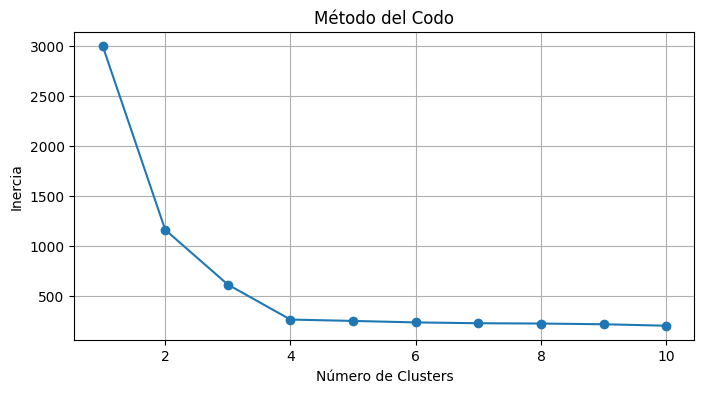

In [5]:
# Método del codo para determinar la cantidad de clusters (entre 1 y 11)
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

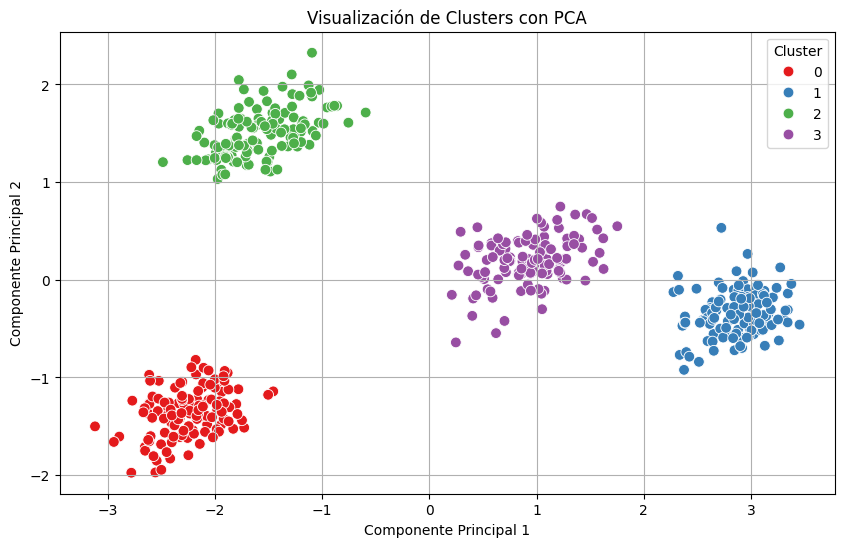


Resumen estadístico por cluster:
           Edad  Ingresos_Anuales  Puntaje_Gasto  Frecuencia_Compra  \
Cluster                                                               
0        59.288         41308.408      19.666100              1.768   
1        24.264         30336.472      80.638531              9.448   
2        43.960         80572.432      41.474018              3.704   
3        34.744         59461.744      60.215056              5.536   

         Antiguedad_Cliente  Canal_Contacto       PC1       PC2  
Cluster                                                          
0                 14.870012             1.0 -2.248071 -1.360436  
1                  1.548743             2.0  2.875343 -0.341922  
2                 10.030256             0.0 -1.568146  1.509352  
3                  4.979101             2.0  0.940875  0.193007  


In [ ]:
# Aplicar KMeans (usamos 4 clusters ya que obtuvo el punto donde la diferencia entre puntos y centroides es menor - intercia)
kmeans = KMeans(n_clusters=4, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA para visualización
pca = PCA(n_components=2)
componentes = pca.fit_transform(X_scaled)
data['PC1'] = componentes[:, 0]
data['PC2'] = componentes[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title("Visualización de Clusters con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

# Resumen por cluster
print("\nResumen estadístico por cluster:")
print(data.groupby('Cluster').mean(numeric_only=True))

Los resultados evidencian que tenemos 4 grupos de clientes en la cooperativa:

**Cluster 0:** Personas de tercera edad, con ingresos medios, bajo puntaje de gasto, baja frecuencia de compra, mucha antigüedad y que prefieren contactarse por teléfono.

**Cluster 1:** Personas jóvenes, con bajos ingresos, alto gasto, alta frecuencia de compra, con poca antigüedad y que prefieren usar la aplicación.

**Cluster 2:** Adultos de altos ingresos, bajo puntaje de gasto, baja frecuencia de compra, con antigüedad considerable y que prefieren contactarse por correo.

**Cluster 3:** Adultos jóvenes, con ingresos medio-altos, gasto medio-alto, baja antigüedad y que prefieren el uso de la aplicación.